In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv")
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')

In [53]:
data = data.drop(data.columns[0],axis=1)

In [54]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [55]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [56]:
data.shape

(491, 13)

In [57]:
test.isnull().sum()

Loan_ID              0
Gender               3
Married              2
Dependents           6
Education            0
Self_Employed        3
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           6
Loan_Amount_Term     1
Credit_History       7
Property_Area        0
dtype: int64

In [58]:
data.isnull().sum()

Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [59]:
data.nunique()

Loan_ID              491
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      408
CoapplicantIncome    239
LoanAmount           176
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [60]:
data['Dependents'] = data['Dependents'].replace({'3+':4})
data['Dependents'] = pd.to_numeric(data['Dependents'])

In [61]:
test['Dependents'] = test['Dependents'].replace({'3+':4})
test['Dependents'] = pd.to_numeric(test['Dependents'])

In [62]:
data.Dependents.value_counts()

0.0    276
1.0     85
2.0     78
4.0     43
Name: Dependents, dtype: int64

In [63]:
fill = ['Gender','Married','Credit_History','Dependents','Self_Employed','Loan_Amount_Term']

In [64]:
for col in fill:
    data[col] = data[col].fillna(data[col].mode()[0])

In [65]:
for col in fill:
    test[col] = test[col].fillna(data[col].mode()[0])

In [66]:
data['LoanAmount'] = data['LoanAmount'].fillna(data.LoanAmount.mean())

In [67]:
test['LoanAmount'] = test['LoanAmount'].fillna(data.LoanAmount.mean())

In [68]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

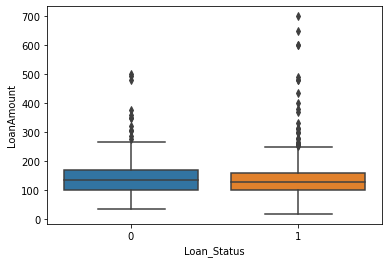

In [70]:
sns.boxplot(x=data.Loan_Status, y=data.LoanAmount, data=data)
plt.show()

In [71]:
X = data.drop({'Loan_Status','Loan_ID','Gender'},axis=1)
y = data['Loan_Status']

In [72]:
test = test.drop({'Loan_ID','Gender'},axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify=y)

In [74]:
dummy = pd.get_dummies(X_train[['Married','Credit_History','Self_Employed','Education','Property_Area']])
X_train = pd.concat([X_train,dummy],axis=1)

In [75]:
dummy = pd.get_dummies(X_test[['Married','Credit_History','Self_Employed','Education','Property_Area']])
X_test = pd.concat([X_test,dummy],axis=1)

In [76]:
dummy = pd.get_dummies(test[['Married','Credit_History','Self_Employed','Education','Property_Area']])
test = pd.concat([test,dummy],axis=1)

In [81]:
X_train.shape

(417, 14)

In [82]:
test.shape

(123, 14)

In [83]:
X_test.shape

(74, 14)

In [80]:
X_test = X_test.drop(['Married','Credit_History','Self_Employed','Education','Property_Area'],axis = 1)
X_train = X_train.drop(['Married','Credit_History','Self_Employed','Education','Property_Area'],axis = 1)
test = test.drop(['Married','Credit_History','Self_Employed','Education','Property_Area'],axis = 1)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

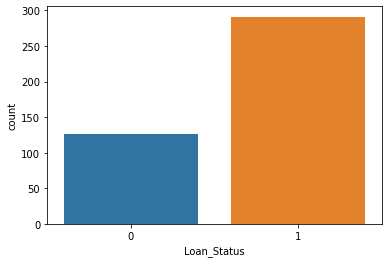

In [84]:
sns.countplot(y_train)

In [85]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 25, sampling_strategy = 1.0)  

In [86]:
X_train, y_train = sm.fit_sample(X_train, y_train)

In [87]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [88]:
y_pred = forest.predict(X_test)

In [89]:
f1_score(y_test, y_pred)

0.7999999999999999

In [90]:
accuracy_score(y_test, y_pred)

0.6891891891891891

In [91]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [5,10,15,20],
    'n_estimators': [500,800,1000,1200]}

In [92]:
rf = RandomForestClassifier(random_state = 1)
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   35.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [500, 800, 1000, 1200]},
                   verbose=2)

In [93]:
f1_score(y_test, grid_search.predict(X_test))

0.8070175438596492

In [94]:
from xgboost import XGBClassifier

In [95]:
xgb_clf = XGBClassifier(tree_method = "exact", predictor = "cpu_predictor")

In [96]:
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.1, 0.3, 0.5, 1, 1.5],
               "max_depth": [5, 7, 9, 11],
               "colsample_bytree": [0.6, 0.8, 1.0],
               "subsample": [0.4, 0.5, 0.6],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2],
               "min_child_weight": [3, 5, 7],
               "n_estimators": [500, 750, 1000, 1250]}

In [97]:
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "f1",
                             cv = 7, verbose = 3, random_state = 40 )

In [98]:
model_xgboost = xgb_rscv.fit(X_train, y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV] subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6, score=0.661, total=   0.3s
[CV] subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6, score=0.593, total=   0.3s
[CV] subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6, score=0.626, total=   0.3s
[CV] subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6, score=0.769, total=   0.4s
[CV] subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6, score=0.889, total=   0.4s
[CV] subsample=0.5, reg_lambda=2, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=11, learning_rate=0.001, gamma=0.5, colsample_bytree=0.6

[CV]  subsample=0.6, reg_lambda=1, reg_alpha=0, n_estimators=750, min_child_weight=7, max_depth=5, learning_rate=0.001, gamma=1, colsample_bytree=0.6, score=0.754, total=   0.4s
[CV] subsample=0.5, reg_lambda=1, reg_alpha=1, n_estimators=1250, min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.5, reg_lambda=1, reg_alpha=1, n_estimators=1250, min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.5, colsample_bytree=0.8, score=0.604, total=   0.6s
[CV] subsample=0.5, reg_lambda=1, reg_alpha=1, n_estimators=1250, min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.5, reg_lambda=1, reg_alpha=1, n_estimators=1250, min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.5, colsample_bytree=0.8, score=0.636, total=   0.6s
[CV] subsample=0.5, reg_lambda=1, reg_alpha=1, n_estimators=1250, min_child_weight=3, max_depth=7, learning_rate=0.1, gamma=0.5, colsample_bytree=0.8 
[CV]  subsa

[CV]  subsample=0.6, reg_lambda=2, reg_alpha=0.5, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.5, colsample_bytree=1.0, score=0.816, total=   0.3s
[CV] subsample=0.6, reg_lambda=2, reg_alpha=0.5, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=2, reg_alpha=0.5, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.5, colsample_bytree=1.0, score=0.940, total=   0.4s
[CV] subsample=0.6, reg_lambda=2, reg_alpha=0.5, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, reg_lambda=2, reg_alpha=0.5, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.5, colsample_bytree=1.0, score=0.763, total=   0.3s
[CV] subsample=0.6, reg_lambda=2, reg_alpha=0.5, n_estimators=500, min_child_weight=7, max_depth=9, learning_rate=0.01, gamma=0.5, colsample_bytree=1.0

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   31.2s finished


In [99]:
xgb_final = XGBClassifier(random_state=0, 
                          n_estimators=xgb_rscv.best_params_['n_estimators'], 
                          max_depth=xgb_rscv.best_params_['max_depth'],
                          learning_rate=xgb_rscv.best_params_['learning_rate'],
                          gamma=xgb_rscv.best_params_['gamma'],
                          colsample_bytree=xgb_rscv.best_params_['colsample_bytree'],
                          subsample=xgb_rscv.best_params_['subsample'],
                          reg_alpha=xgb_rscv.best_params_['reg_alpha'],
                          reg_lambda=xgb_rscv.best_params_['reg_lambda'],
                          min_child_weight=xgb_rscv.best_params_['min_child_weight'])
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=11,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
f1_score(y_test, xgb_final.predict(X_test))

0.8141592920353982

In [101]:
accuracy_score(y_test, xgb_final.predict(X_test))

0.7162162162162162

In [106]:
X_use = pd.concat([X_train,X_test])
y_use = pd.concat([y_train,y_test])

In [107]:
xgb_final.fit(X_use,y_use)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=11,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=2, scale_pos_weight=1, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
df = pd.DataFrame({'prediction':xgb_final.predict(test)})

In [110]:
df.to_csv('Dphi541.csv',index=False)

In [111]:
import joblib
joblib.dump(XGA, "loan.pkl")

['loan.pkl']

In [112]:
X_use.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,2920,16.120001,87.0,360.0,0,1,1,0,1,0,1,0,0
1,2.0,3316,3500.000000,88.0,360.0,0,1,0,1,1,0,0,0,1
2,0.0,2987,0.000000,88.0,360.0,1,0,1,0,1,0,0,1,0
3,1.0,3652,0.000000,95.0,360.0,1,0,1,0,1,0,0,1,0
4,0.0,5417,0.000000,143.0,480.0,1,0,1,0,1,0,0,0,1


In [ ]:
De